In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn

In [2]:
import easyaccess as ea

In [3]:
con=ea.connect()

Connecting to DB ** desdr ** ...


In [4]:
query = """
SELECT 
 COADD_OBJECT_ID,RA,DEC, 
 MAG_AUTO_G G,
 MAG_AUTO_R R,
 WAVG_MAG_PSF_G G_PSF,
 WAVG_MAG_PSF_R R_PSF
FROM DR1_MAIN 
WHERE
  RA between 323.36-0.12 and 323.36+0.12 and 
  DEC between -0.82-0.12 and -0.82+0.12 and
  WAVG_SPREAD_MODEL_I + 3.0*WAVG_SPREADERR_MODEL_I < 0.005 and 
  WAVG_SPREAD_MODEL_I > -1 and 
  IMAFLAGS_ISO_G = 0 and
  IMAFLAGS_ISO_R = 0 and
  FLAGS_G < 4 and
  FLAGS_R < 4
"""

In [5]:
df=con.query_to_pandas(query)

Text(0,0.5,'G-R')

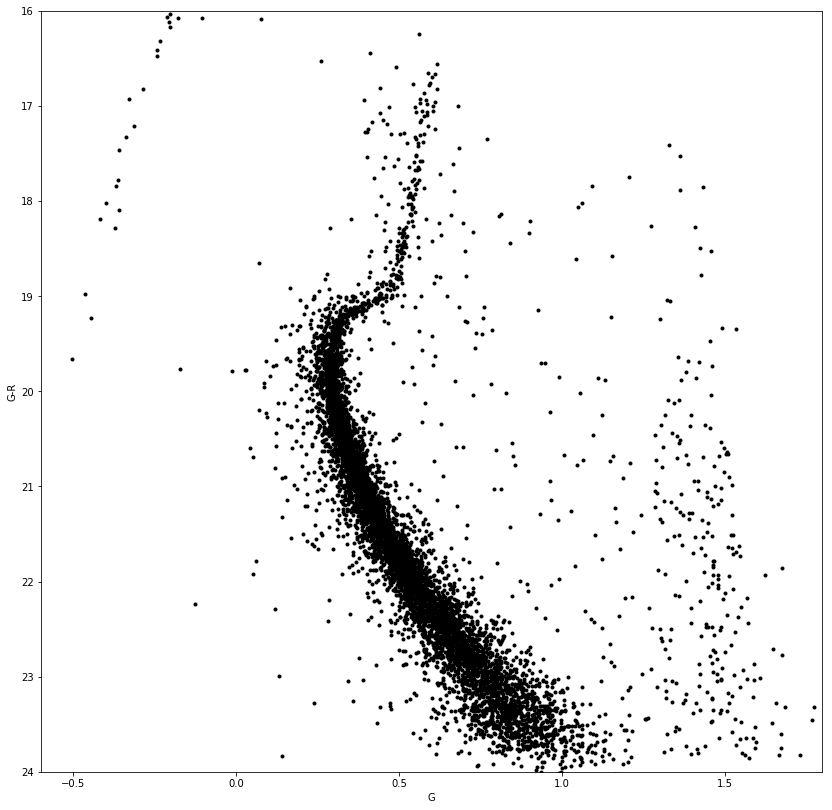

In [6]:
plt.figure(figsize=(14,14))
plt.plot(df.G_PSF-df.R_PSF,df.G_PSF,'k.')
plt.xlim(-0.6,1.8)
plt.ylim(24,16)
plt.xlabel('G')
plt.ylabel('G-R')